Factorial Design: Effects of Age, Smoking, BMI On Medical Costs

Author: Michael Wu

In [1]:
library(readr)
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ purrr     1.0.1
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Introduction

In this study, we are interested in how an individual's characteristics such as age, smoking status, BMI, and the variables' interactions can affect their medical expenses. Exploring the relationships between these variables can help insurance companies to access risks and estimate expected medical costs of individuals based on their characteristics, and as a result, more accurately assign prices for their insurance plans. In addition, our findings can provide insights on how an individual's behaviours, such as whether they smoke or not, their eating habits, often indicated by their body mass index, and/or interaction between their eating habits and smoking status, can contribute to more or fewer visits to the hospital and possibly higher or lower medical bills. Our hypothesis is that people who smoke, people who are older, and people whose BMI is greater than 25 (overweight) will have higher medical costs on average. We also expect there will be interaction effects between all three of the variables, specifically the two-way interactions.

## Materials and Methods

### Data

The data, called "Medical Cost Personal Dataset" is acquired from the website "kaggle.com"[1]. It has $1338$ observations, where each observation represents an individual, and contains that person's sex, age, BMI, smoking status, number of children, region, and medical costs billed by health insurance.

Key Variables:

- Charges (Double): medical costs billed.
- age (Factor): coded into factors of 0 and 1, where 0 indicates age $<40$, and 1 indicates age $\geq 40$.
- BMI (Factor): coded into factors of 0 and 1, where 0 indicates BMI $<25$, and 1 indicates BMI $\geq 25$. BMI $\geq 25$ is considered overweight.
- smoking (Factor): coded into factors of 0 and 1, where 0 indicates that the person does not smoke, and 1 indicates that the person smokes.

### Experimental Design

In this study, we will use the full factorial design with replications to study the effects of the variables (each with two levels) age, BMI, and smoking status on an individual's medical costs. Interactions between the variables will also be studied. Specifically, the interaction between age and BMI, age and smoking status, BMI and smoking status, and lastly the three variables combined. We have decided to use the full factorial design because we are interested in estimating the main effects of multiple(3) independent variables as well as the potential interaction effects between them. In addition, we have enough data where we can observe all possible combinations of the levels of independent variables, and also have the capacity to conduct multiple replications with each combination of experimental conditions. Because we only have three independent variables of interest and thus a small number of combinations, we have decided to do ten replications for each combination, so our findings can be more precise and reliable. To accomplish the randomness of "run order", we grouped the data by "age", "BMI", and "Smoking Status", then randomly selected ten observations from each unique grouping. The full factorial design will help us determine the main effects of age, BMI, smoking, and the interaction effects between them, on an individual's medical costs, which aligns with the objectives of our study.


### Statistical Methods

### Interaction Plot


Our model contains three variables, so the design is a $2^3$ factorial design. The possible interactions are three two-way interactions and one three-way interactions. Interaction plots will let us see the presence of interactions between two variables. Specifically, if the two lines are parallel, there's no interactions, but if the lines are non-parallel or they cross, there is possible interactions. The interaction plots will give us an idea of whether there are interaction effects before doing regression.

### Linear Regression


Linear regression will be used to estimate the main effects and interaction effects of our independent variables: age, BMI, and smoking status on our response, medical cost. The results from linear regression will provide us with coefficient estimates, standard error estimates, as well as the p-value associated with each independent variables(s). 

### Confidence Interval


$95\%$ Confidence intervals will be estimated for the true values of effects for both main and interactions. We do not know what the true values of the effects are, but the confidence intervals give us an idea of where those values may fall. Given our samples, the lower bound and upperbound of the intervals, we will be $95\%$ confident that the true values of the effects will fall within the intervals.

### Hypothesis Test


We will be using the student's t-test to see if there is a significant relationship between our independent variables and the response. A p-value of $0.05$ will be used to assess the variables' significance.



## Results & Discussion

The linear model for our $2^3$ full factorial design is:

$$Y_i = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + \beta_3X_{i3} + \beta_4X_{i1} X_{i2} + \beta_5X_{i1}X_{i3} + \beta_6 X_{i2}X_{i3} + \beta_7 X_{i1}X_{i2}X_{i3} + \epsilon$$
where 

- $Y_i$ is the medical expenses charged for individual $i$.
- $X_{i1}$ is a dummy variable indicating whether individual $i$ is over 40 years of age.
- $X_{i2}$ is a dummy variable indicating whether individual $i$ is a smoker.
- $X_{i3}$ is a dummy variable indicating whether individual $i$ has a BMI of over 25.
- $X_{i1} X_{i2}$ is the interaction between age and smoking, $X_{i2}X_{i3}$ is the interaction between smoking and BMI, etc.
- The $\beta$'s represent the estimated effects.

In [2]:
set.seed(2)

insurance <- read_csv("~/sta305/final/insurance.csv")
insurance$sex <- as.factor(insurance$sex)
insurance$smoker <- as.factor(insurance$smoker)

insurance <- insurance %>%
  mutate(bmi_over_25 = as.factor(case_when(bmi >= 25 ~ "over",
                                 bmi < 25 ~ "under")),
         age_over_40 = as.factor(case_when(age >= 40 ~ "over",
                                 age < 40 ~ "under"))) %>%
  dplyr::select(charges, age_over_40, smoker, bmi_over_25)

data <- insurance %>%
  group_by(age_over_40, smoker, bmi_over_25) %>%
  slice_sample(n = 10)

data$age_over_40 <- factor(data$age_over_40, levels = c("under", "over"))
data$bmi_over_25 <- factor(data$bmi_over_25, levels = c("under", "over"))
data$smoker <- factor(data$smoker, levels = c("no", "yes"))

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Interaction Plots

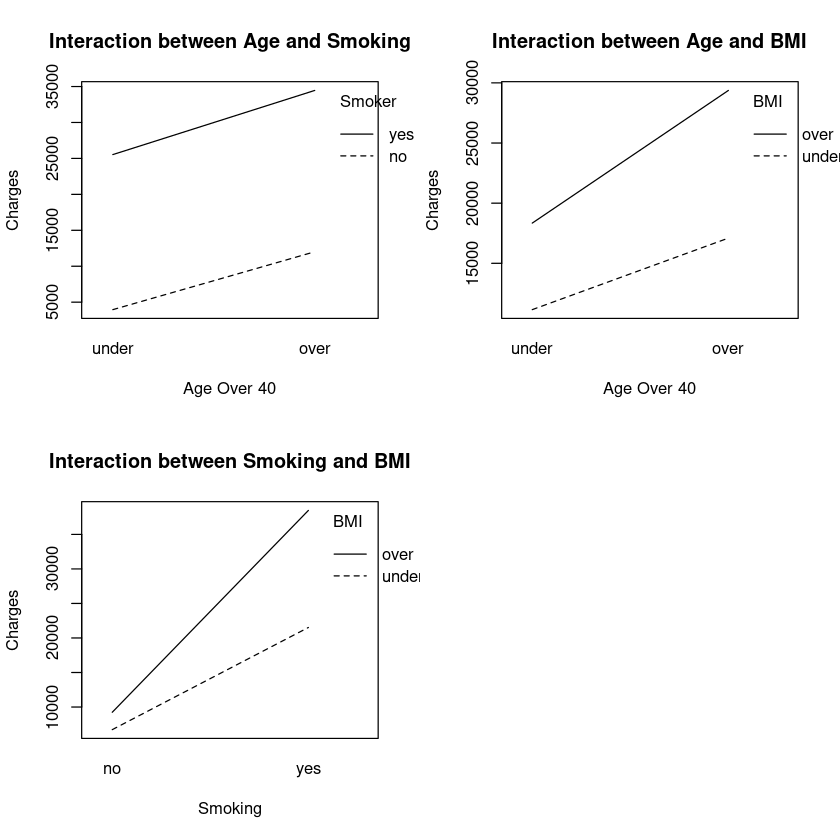

In [3]:
par(mfrow = c(2,2))
interaction.plot(data$age_over_40, data$smoker, data$charges, type = "l",
                 xlab = "Age Over 40",trace.label = "Smoker",
                 ylab = "Charges", main = "Interaction between Age and Smoking")
interaction.plot(data$age_over_40, data$bmi_over_25, data$charges, type = "l",
                 xlab = "Age Over 40",trace.label = "BMI",
                 ylab = "Charges", main = "Interaction between Age and BMI")
interaction.plot(data$smoker, data$bmi_over_25, data$charges, type = "l",
                 xlab = "Smoking",trace.label = "BMI",
                 ylab = "Charges", main = "Interaction between Smoking and BMI")

The two lines in the first plot looks about parallel so there does not appear to be any interactions between age and smoking. Younger people and older people have similar increases in medical expenses if they smoke. Looking at the second plot, the lines are not exactly parallel so there may be interaction effects between age and BMI. Looking at the third plot, the lines are not parallel so there is a strong possibility that interactions between age and BMI exist.

In [4]:

mod <- lm(charges ~ age_over_40*smoker*bmi_over_25, data = data)
round(summary(mod)$coefficients,2)

confint(mod)


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3178.72,2413.11,1.32,0.19
age_over_40over,7093.12,3412.66,2.08,0.04
smokeryes,15940.44,3412.66,4.67,0.00
bmi_over_25over,1560.69,3412.66,0.46,0.65
age_over_40over:smokeryes,-2293.40,4826.23,-0.48,0.64
age_over_40over:bmi_over_25over,1914.98,4826.23,0.40,0.69
smokeryes:bmi_over_25over,11268.93,4826.23,2.33,0.02
age_over_40over:smokeryes:bmi_over_25over,6329.92,6825.31,0.93,0.36


,2.5 %,97.5 %
(Intercept),-1631.7348,7989.169
age_over_40over,290.1174,13896.131
smokeryes,9137.4330,22743.446
bmi_over_25over,-5242.3196,8363.694
age_over_40over:smokeryes,-11914.3015,7327.507
age_over_40over:bmi_over_25over,-7705.9276,11535.881
smokeryes:bmi_over_25over,1648.0230,20889.831
age_over_40over:smokeryes:bmi_over_25over,-7276.0965,19935.930


### Summary, Main & Interaction Effects

|      Variable     | Estimate | T Statistic | SD Error  |   P value    |
| ----------------- | -------- | ----------- | --------- | ------------ |
|      Intercept    |   3179   |   1.317     |   2413    |   0.1919     |
|        Age40      |   7093   |   2.078     |   3413    |   0.0412 *   |
|       Smoking     |   15940  |   4.671     |   3413    | 1.36e-05 *** |
|        BMI25      |   1561   |   0.457     |   3413    |   0.6488     | 
|    Age40:Smoking  |  -2293   |  -0.475     |   4826    |   0.6361     | 
|     Age40:BMI25   |   1915   |   0.397     |   4826    |   0.6927     | 
|    Smoking:BMI25  |   11269  |   2.335     |   4826    |   0.0223 *   | 
| Age40:Smoking:BMI |   6330   |   0.926     |   6825    |   0.3568     | 


We see from the table that if an individual is over 40 years of age, their medical expenses increase by approximately $\$7000$. If an individual smokes, their medical expenses increases by about $\$15940$. The two main effects are significant. T-test and the associated p-value show that BMI is not significant. However, the interaction effect between smoking and BMI is. To interpret, individuals with BMI over $25$ sees dramatic increases of $\$11269$ in their medical bills if they smoke, vs individuals with BMI under $25$ who also smokes. The interaction effect is clearly depicted in the third interaction plot above. The other interaction effects are not significant. However, this may be due to a small sample size.

### Confidence Intervals

|      Variable     |    2.5%    |    97.5%   |
| ----------------- | ---------- | ---------- |
|      Intercept    | -1631.74   |  7989.16   |
|        Age40      |  290.12    |  13896.13  |
|       Smoking     |  9137.43   |  22743.44  |
|        BMI25      | -5242.31   |  8363.69   |
|    Age40:Smoking  | -11914.30  |  7327.50   |
|     Age40:BMI25   | -7705.92   |  11535.88  | 
|    Smoking:BMI25  |  1648.02   |  20889.83  | 
| Age40:Smoking:BMI | -7276.09   |  19935.93  |


Above is the confidence interval for all of our estimated coefficients. We see that all of the variables that were not significant from the summary table are variables whose upper and lower bounds do not have the same "$+-$" signs. The relatively wide confidence intervals indicate that our sample sizes may be small or that there's simply high variability among estimates.


## Conclusion

Using a $2^3$ full factorial design with $10$ replications, we explored the effects of age, smoking, BMI, and their interactions on an individual's medical expenses. The design is chosen because of our interest in not only the main effects but also the interaction effects. Furthermore, we have enough resources(data) to conduct a design like this. Interaction plots show that there may be interactions between age and BMI and strong interactions between BMI and smoking. Hypothesis tests (t-test) indicate that age, smoking, and the interactions between smoking and BMI have significant effects on medical costs, at the $\alpha = 0.05$ level. Older people ($age \geq 40$) on average, need to spend $\$7000$ more than younger people, and people who smokes need to spend $\$16000$ more than people who don't on medical bills. Lastly, there is interaction effect between BMI and smoking, at around $\$11000$. Overall, the full factorial design helped achieve our objectives. Higher number of replications may have increased the preciseness and reliability of our findings.


## References

1. Kaggle.com. *Medical Cost Personal Datasets*. [https://www.kaggle.com/datasets/mirichoi0218/insurance](https://www.kaggle.com/datasets/mirichoi0218/insurance). (Last Accessed: April 3, 2022) 
